# 图像分类预测

本教程介绍如何在MindCV中调用预训练模型，在测试图像上进行分类预测。

## 模型加载

### 查看全部可用的网络模型
通过调用`mindcv.models`中的`registry.list_models`函数，可以打印出全部网络模型的名字，一个网络在不同参数配置下的模型也会分别打印出来，例如resnet18 / resnet34 / resnet50 / resnet101 / resnet152。

In [1]:
import sys
sys.path.append("..")
from mindcv.models import registry
registry.list_models()

['BiTresnet50',
 'RepMLPNet_B224',
 'RepMLPNet_B256',
 'RepMLPNet_D256',
 'RepMLPNet_L256',
 'RepMLPNet_T224',
 'RepMLPNet_T256',
 'convit_base',
 'convit_base_plus',
 'convit_small',
 'convit_small_plus',
 'convit_tiny',
 'convit_tiny_plus',
 'convnext_base',
 'convnext_large',
 'convnext_small',
 'convnext_tiny',
 'convnext_xlarge',
 'densenet121',
 'densenet161',
 'densenet169',
 'densenet201',
 'dpn107',
 'dpn131',
 'dpn92',
 'dpn98',
 'efficientnet_b0',
 'efficientnet_b1',
 'efficientnet_b2',
 'efficientnet_b3',
 'efficientnet_b4',
 'efficientnet_b5',
 'efficientnet_b6',
 'efficientnet_b7',
 'efficientnet_v2_l',
 'efficientnet_v2_m',
 'efficientnet_v2_s',
 'efficientnet_v2_xl',
 'ghostnet_1x',
 'ghostnet_nose_1x',
 'googlenet',
 'inception_v3',
 'inception_v4',
 'mnasnet0_5',
 'mnasnet0_75',
 'mnasnet1_0',
 'mnasnet1_3',
 'mnasnet1_4',
 'mobilenet_v1_025_224',
 'mobilenet_v1_050_224',
 'mobilenet_v1_075_224',
 'mobilenet_v1_100_224',
 'mobilenet_v2_035_128',
 'mobilenet_v2_035_160

### 加载预训练模型
我们以resnet50模型为例，介绍两种使用`mindcv.models`中`create_model`函数进行模型checkpoint加载的方法。
1). 当接口中的`pretrained`参数设置为True时，可以自动下载网络权重。

In [2]:
from mindcv.models import create_model
model = create_model(model_name='resnet50', num_classes=1000, pretrained=True)
# 切换网络的执行逻辑为推理场景
model.set_train(False)

102453248B [00:15, 6714221.95B/s]                                                                                      


ResNet<
  (conv1): Conv2d<input_channels=3, output_channels=64, kernel_size=(7, 7), stride=(2, 2), pad_mode=pad, padding=3, dilation=(1, 1), group=1, has_bias=False, weight_init=normal, bias_init=zeros, format=NCHW>
  (bn1): BatchNorm2d<num_features=64, eps=1e-05, momentum=0.9, gamma=Parameter (name=bn1.gamma, shape=(64,), dtype=Float32, requires_grad=True), beta=Parameter (name=bn1.beta, shape=(64,), dtype=Float32, requires_grad=True), moving_mean=Parameter (name=bn1.moving_mean, shape=(64,), dtype=Float32, requires_grad=False), moving_variance=Parameter (name=bn1.moving_variance, shape=(64,), dtype=Float32, requires_grad=False)>
  (relu): ReLU<>
  (max_pool): MaxPool2d<kernel_size=3, stride=2, pad_mode=SAME>
  (layer1): SequentialCell<
    (0): Bottleneck<
      (conv1): Conv2d<input_channels=64, output_channels=64, kernel_size=(1, 1), stride=(1, 1), pad_mode=same, padding=0, dilation=(1, 1), group=1, has_bias=False, weight_init=normal, bias_init=zeros, format=NCHW>
      (bn1): Batc

2). 当接口中的`checkpoint_path`参数设置为文件路径时，可以从本地加载后缀为`.ckpt`的模型参数文件。

In [3]:
from mindcv.models import create_model
model = create_model(model_name='resnet50', num_classes=1000, checkpoint_path='./resnet50_224.ckpt')
# 切换网络的执行逻辑为推理场景
model.set_train(False)

ResNet<
  (conv1): Conv2d<input_channels=3, output_channels=64, kernel_size=(7, 7), stride=(2, 2), pad_mode=pad, padding=3, dilation=(1, 1), group=1, has_bias=False, weight_init=normal, bias_init=zeros, format=NCHW>
  (bn1): BatchNorm2d<num_features=64, eps=1e-05, momentum=0.9, gamma=Parameter (name=bn1.gamma, shape=(64,), dtype=Float32, requires_grad=True), beta=Parameter (name=bn1.beta, shape=(64,), dtype=Float32, requires_grad=True), moving_mean=Parameter (name=bn1.moving_mean, shape=(64,), dtype=Float32, requires_grad=False), moving_variance=Parameter (name=bn1.moving_variance, shape=(64,), dtype=Float32, requires_grad=False)>
  (relu): ReLU<>
  (max_pool): MaxPool2d<kernel_size=3, stride=2, pad_mode=SAME>
  (layer1): SequentialCell<
    (0): Bottleneck<
      (conv1): Conv2d<input_channels=64, output_channels=64, kernel_size=(1, 1), stride=(1, 1), pad_mode=same, padding=0, dilation=(1, 1), group=1, has_bias=False, weight_init=normal, bias_init=zeros, format=NCHW>
      (bn1): Batc

## 数据准备

### 构造数据集
这里，我们下载一张Wikipedia的图片作为测试图片，使用`mindcv.data`中的`create_dataset`函数，为单张图片构造自定义数据集。

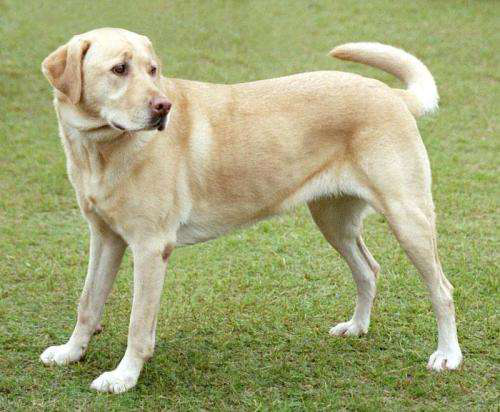

In [4]:
from mindcv.data import create_dataset
num_workers = 1
# 数据集目录路径
data_dir = "./data/"
dataset = create_dataset(root=data_dir, split='test', num_parallel_workers=num_workers)
# 图像可视
from PIL import Image
display(Image.open("./data/test/dog/dog.jpg"))

数据集的目录结构如下：

```Text
data/
└─ test
    ├─ dog
    │   ├─ dog.jpg
    │   └─ ……
    └─ ……
```

### 数据预处理
通过调用`create_transforms`函数，获得预训练模型使用的ImageNet数据集的数据处理策略(transform list)。

我们将得到的transform list传入`create_loader`函数，指定`batch_size=1`和其他参数，即可完成测试数据的准备，返回`Dataset` Object，作为模型的输入。

In [5]:
from mindcv.data import create_transforms, create_loader
transforms_list = create_transforms(dataset_name='imagenet', is_training=False)
data_loader = create_loader(
        dataset=dataset,
        batch_size=1,
        is_training=False,
        num_classes=1000,
        transform=transforms_list,
        num_parallel_workers=num_workers
    )

## 模型推理
将自定义数据集的图片传入模型，获得推理的结果。这里使用`mindspore.ops`的`Squeeze`函数去除batch维度。

In [6]:
import mindspore.ops as P
import numpy as np
images, _ = next(data_loader.create_tuple_iterator())
output = P.Squeeze()(model(images))
pred = np.argmax(output.asnumpy())

In [7]:
with open("imagenet1000_clsidx_to_labels.txt") as f:
    idx2label = eval(f.read())
print('predict: {}'.format(idx2label[pred]))

predict: Labrador retriever
